
#          SpaceX Launch Data Analysis and Feature Engineering



# Objectives :

### - Perform exploratory data analysis (EDA) on SpaceX launch data to uncover patterns and insights.
### - Visualize relationships between key variables such as Flight Number, Payload, Launch Site, and Orbit type.
### - Analyze success rates across different orbits and launch sites.
### - Identify trends in launch success over the years.
### - Conduct feature engineering to prepare data for future success prediction modeling.
### - Create dummy variables for categorical columns such as Orbit, Launch Site, Landing Pad, and Serial.
### - Cast all numeric columns to float64 for consistency and compatibility with machine learning algorithms.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# First, let's read the SpaceX dataset into a Pandas dataframe and print its summary
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


C:\Users\MoKa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


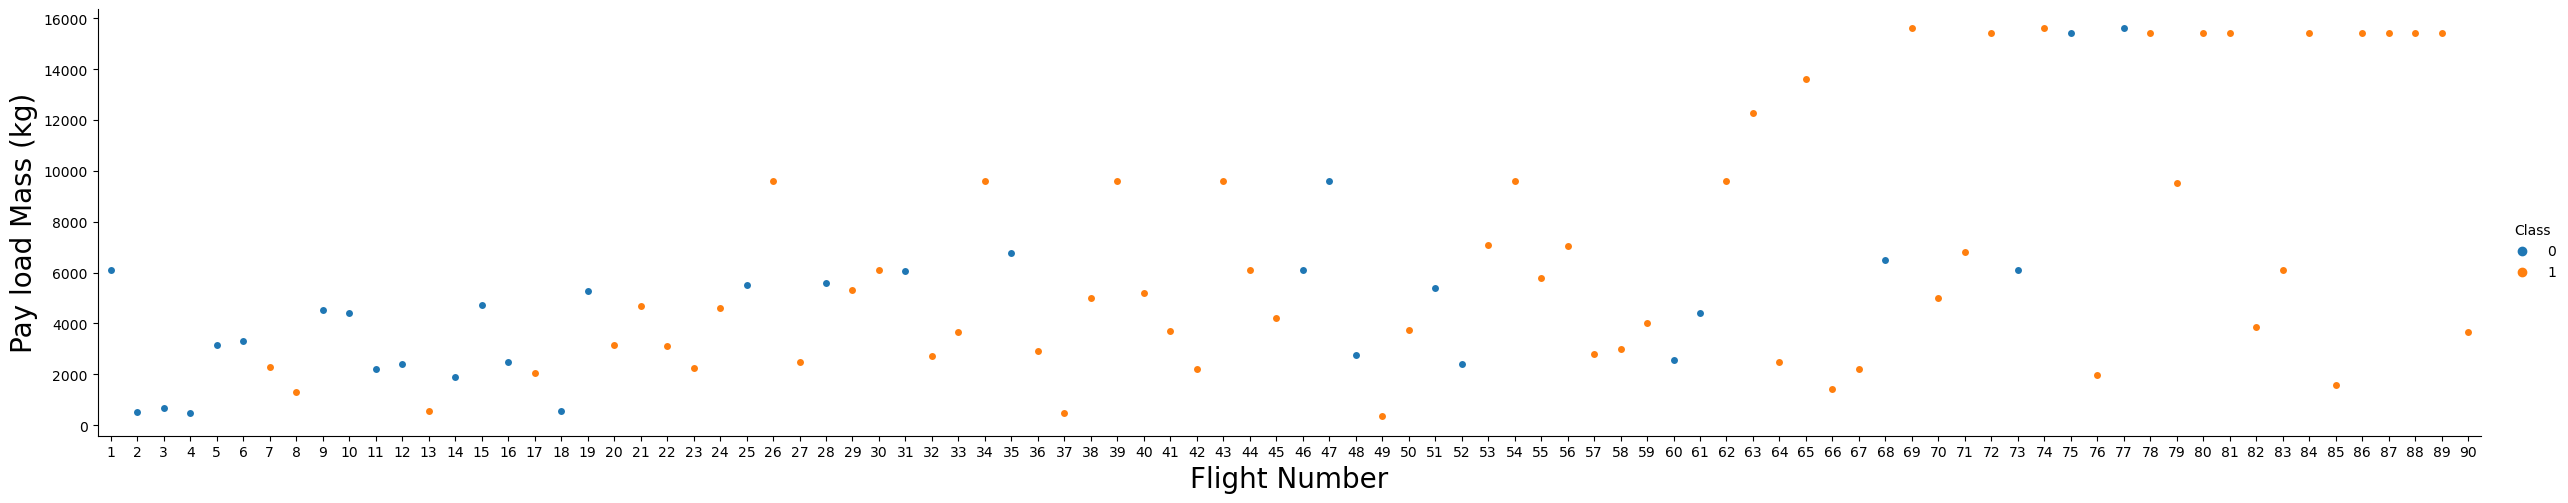

In [6]:
# We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

C:\Users\MoKa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


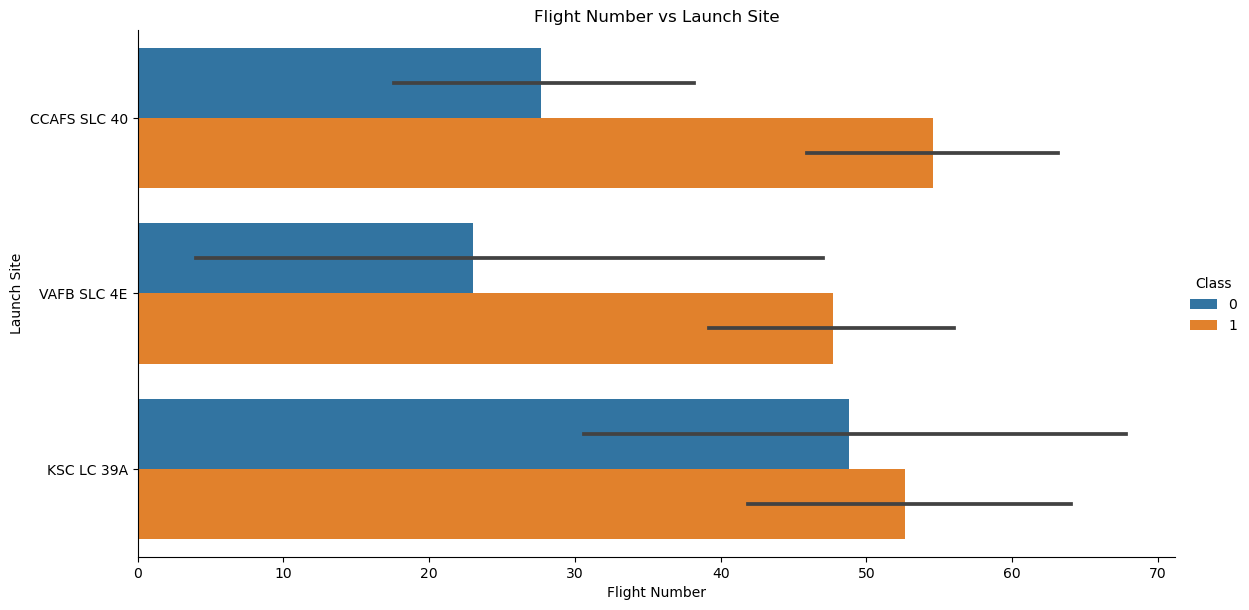

In [9]:
# Next, let's drill down to each site visualize its detailed launch records.
# Plot FlightNumber vs LaunchSite
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, kind='bar', height=6, aspect=2)

# Set plot labels and title
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight Number vs Launch Site')

# Show plot
plt.show()


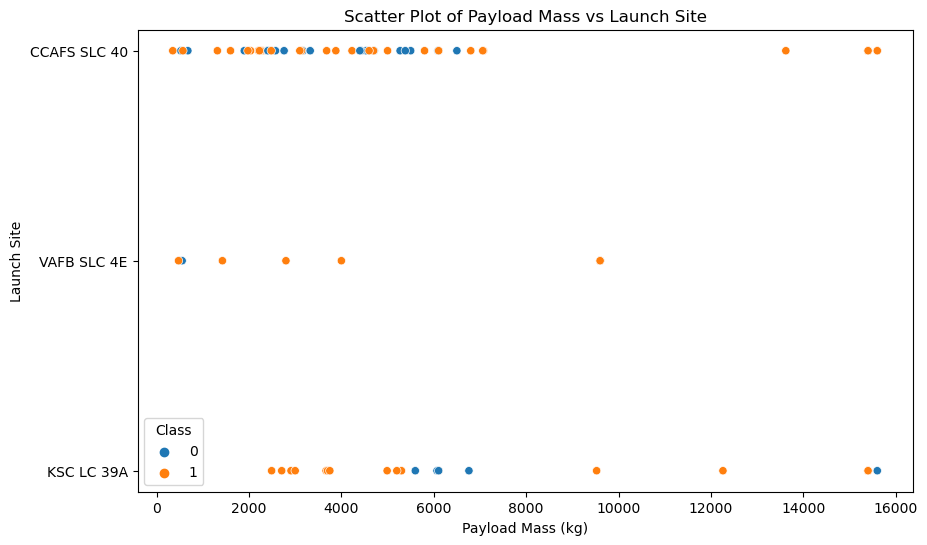

In [10]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df)

# Set plot labels and title
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.title('Scatter Plot of Payload Mass vs Launch Site')

# Show plot
plt.show()


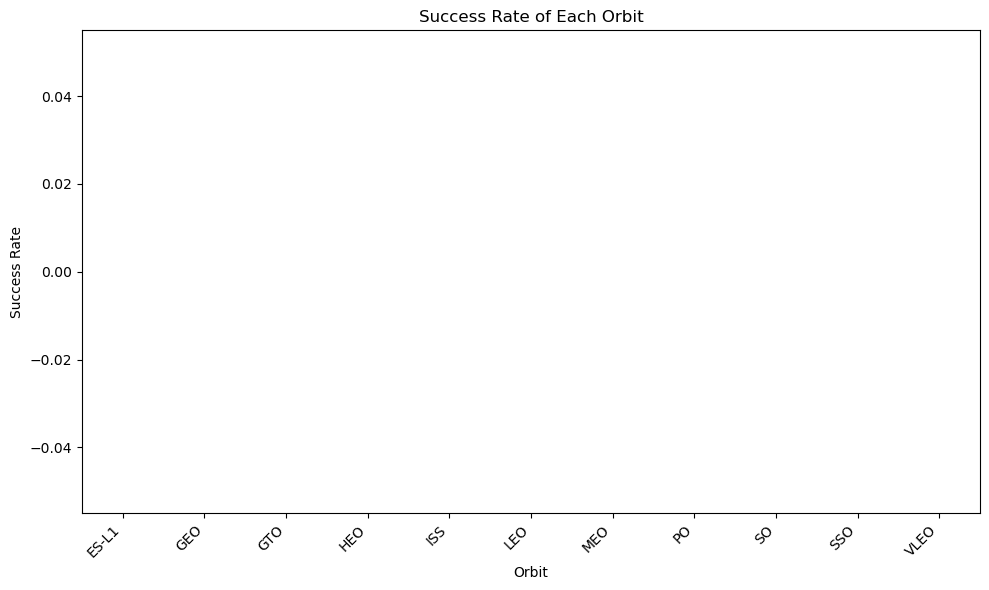

In [11]:
# Next, we want to visually check if there are any relationship between success rate and orbit type.
# Let's create a `bar chart` for the sucess rate of each orbit
# Calculate success rate for each orbit
orbit_success_rate = df.groupby('Orbit')['Class'].apply(lambda x: (x == 'Success').mean()).reset_index(name='SuccessRate')

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='SuccessRate', data=orbit_success_rate, palette='viridis')

# Set plot labels and title
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.title('Success Rate of Each Orbit')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

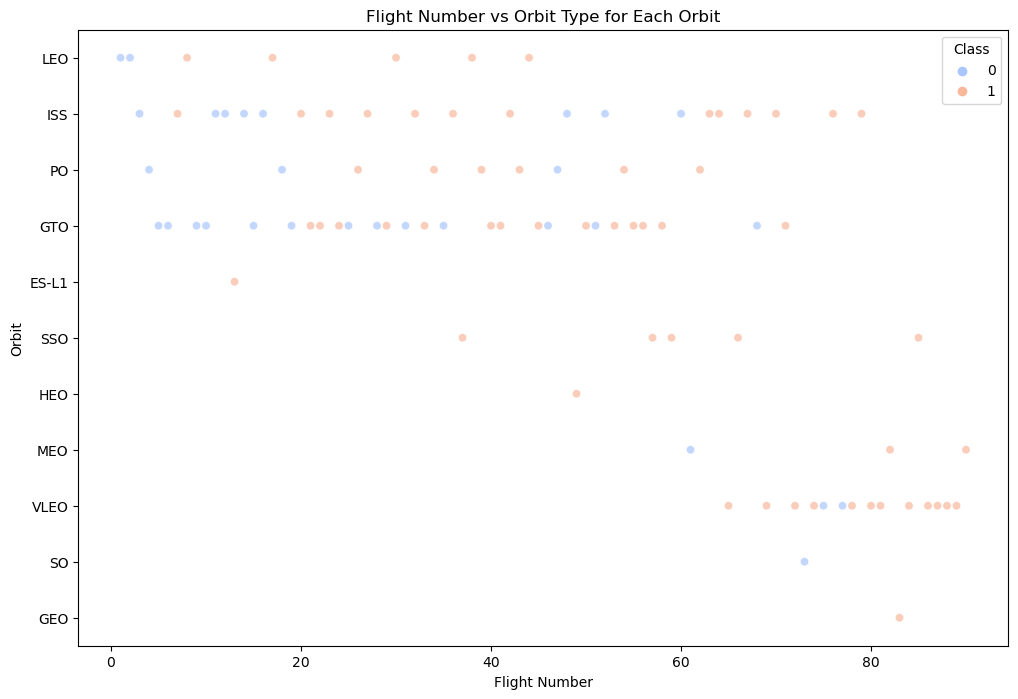

In [12]:
# Plot scatter plot for FlightNumber vs Orbit type for each orbit
plt.figure(figsize=(12, 8))
sns.scatterplot(x='FlightNumber', y='Orbit', data=df, hue='Class', palette='coolwarm', alpha=0.7)

# Set plot labels and title
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Flight Number vs Orbit Type for Each Orbit')

# Show plot
plt.show()

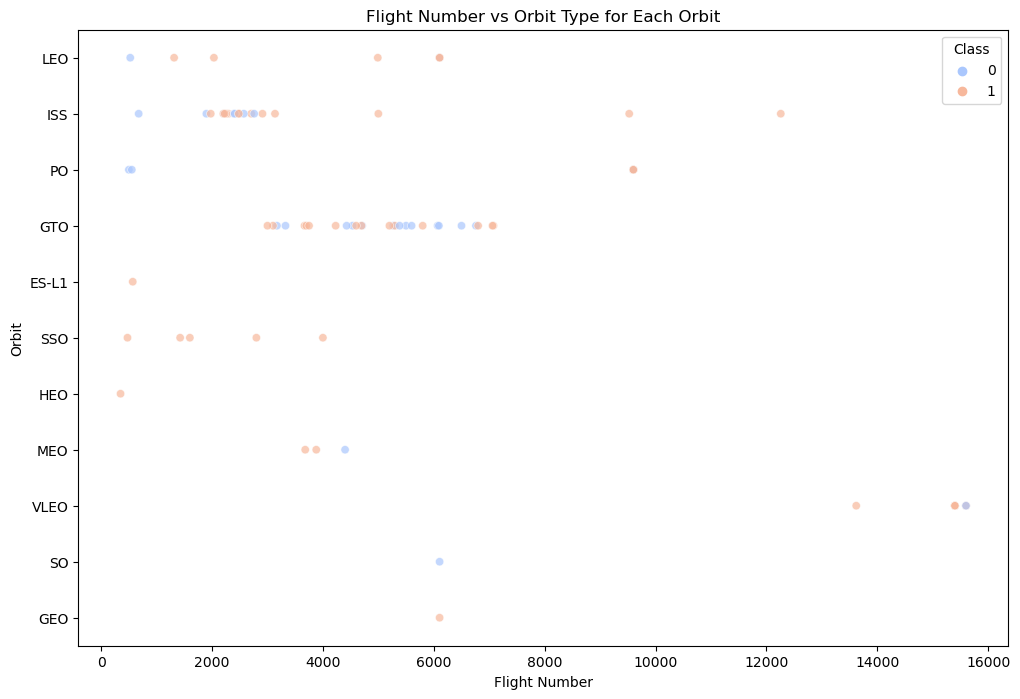

In [13]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PayloadMass', y='Orbit', data=df, hue='Class', palette='coolwarm', alpha=0.7)

# Set plot labels and title
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.title('Flight Number vs Orbit Type for Each Orbit')

# Show plot
plt.show()


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    
    


# In[14
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate success rate for each year
yearly_success_rate = df.groupby('Year')['Class'].apply(lambda x: (x == 'Success').mean()).reset_index(name='SuccessRate')

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='SuccessRate', data=yearly_success_rate, marker='o')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Success Rate by Year')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
